In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt 

In [3]:
%matplotlib inline

In [10]:
from sklearn.datasets import make_blobs 

In [29]:
data= make_blobs(n_samples=100, n_features=3, centers=2,random_state=101)

In [30]:
type(data)

tuple

In [31]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

In [32]:
data[0]
data[1]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
scaled_data = scaler.fit_transform(data[0])

In [36]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [37]:
from mpl_toolkits.mplot3d import Axes3D

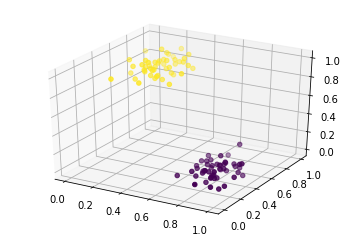

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c = data[1])

In [49]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [50]:
num_inputs = 3  # 3 dimensional input\n
num_hidden = 2  # 2 dimensional representation
num_outputs = num_inputs # Must be true for an autoencoder!\n",
learning_rate = 0.01

In [51]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [52]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

In [53]:
loss = tf.reduce_mean(tf.square(outputs - X))  # MSE"

In [55]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train  = optimizer.minimize( loss)

In [56]:
init = tf.global_variables_initializer()

In [57]:
num_steps = 1000

In [58]:
with tf.Session() as sess:
    sess.run(init)
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X: scaled_data})
        # Now ask for the hidden layer output (the 2 dimensional output)\n",
    output_2d = hidden.eval(feed_dict={X: scaled_data})

In [63]:
output_2d

array([[-0.35121566, -0.7868127 ],
       [-0.3600706 , -0.771543  ],
       [ 0.27388233,  0.1920138 ],
       [-0.42209977, -0.6687027 ],
       [ 0.08879147,  0.36707455],
       [-0.32732403, -0.8864841 ],
       [-0.2619487 , -0.8741084 ],
       [-0.34664065, -0.8303119 ],
       [-0.03296442,  0.3735125 ],
       [ 0.27526045,  0.2765677 ],
       [ 0.19326036,  0.22907895],
       [-0.3237321 , -0.7369982 ],
       [-0.4411533 , -0.58857644],
       [-0.2158975 , -0.7272351 ],
       [-0.2240524 , -0.69600993],
       [-0.44210196, -0.5417352 ],
       [-0.5612864 , -0.67319643],
       [ 0.25147998,  0.25218123],
       [-0.5506232 , -0.71144223],
       [-0.464854  , -0.6578497 ],
       [-0.48093665, -0.6461098 ],
       [ 0.29707646,  0.35832554],
       [-0.39934033, -0.65592265],
       [-0.38352424, -0.70974576],
       [ 0.5313826 ,  0.13859546],
       [ 0.0973181 ,  0.28050107],
       [-0.34238884, -0.8926511 ],
       [ 0.26851696,  0.14913076],
       [ 0.2723046 ,

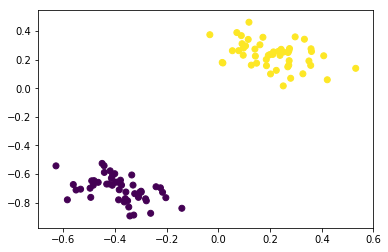

In [64]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=data[1])